In [19]:
# Dependencies
import requests
from config import api_key
import time
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"

# Store a Global Warming term
query = "global warming"

end_date = datetime.date.today()
begin_date = end_date - relativedelta(years=3)


In [12]:
print("Number of pages articles extracted")
# Empty list for articles
articles_list = []
web_url = []
pub_date = []
snippet = []
type_of_material = []

# loop through pages 0-100

for page in range(0, 100):
    query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"
    # create query with page number
    query_url = f"{query_url}&page={str(page)}"
    request = requests.get(query_url)
    articles = request.json()
    time.sleep(6)

    print(f"Status {request.status_code} ")
    # Add a six second interval between queries to stay within API query limits
    # loop through the response and append each article to the list
    for article in articles["response"]["docs"]:
        try:
                articles_list.append(article)

        except:
            articles_list.append("NA")
            
        
    for article in articles["response"]["docs"]:

        try:
            web_url.append(article["web_url"])
        except:
            web_url.append("NA")
        
    for article in articles["response"]["docs"]:

        try:
            pub_date.append(article['pub_date'].split('T')[0])
        except:
            pub_date.append("NA")
            
            
    for article in articles["response"]["docs"]:

        try:
            snippet.append(article['snippet'])
        except:
            snippet.append("NA")           

    for article in articles["response"]["docs"]:

        try:
            type_of_material.append(article['type_of_material'])
        except:
            type_of_material.append("NA")  
            
    print(f"Page {page} done")
print("Completed")                         

Number of pages articles extracted
Status 200 
Page 0 done
Status 200 
Page 1 done
Status 200 
Page 2 done
Status 200 
Page 3 done
Status 200 
Page 4 done
Status 200 
Page 5 done
Status 200 
Page 6 done
Status 200 
Page 7 done
Status 200 
Page 8 done
Status 200 
Page 9 done
Status 200 
Page 10 done
Status 200 
Page 11 done
Status 200 
Page 12 done
Status 200 
Page 13 done
Status 200 
Page 14 done
Status 200 
Page 15 done
Status 200 
Page 16 done
Status 200 
Page 17 done
Status 200 
Page 18 done
Status 200 
Page 19 done
Status 200 
Page 20 done
Status 200 
Page 21 done
Status 200 
Page 22 done
Status 200 
Page 23 done
Status 200 
Page 24 done
Status 200 
Page 25 done
Status 200 
Page 26 done
Status 200 
Page 27 done
Status 200 
Page 28 done
Status 200 
Page 29 done
Status 200 
Page 30 done
Status 200 
Page 31 done
Status 200 
Page 32 done
Status 200 
Page 33 done
Status 200 
Page 34 done
Status 200 
Page 35 done
Status 200 
Page 36 done
Status 200 
Page 37 done
Status 200 
Page 38 done


In [13]:
len(snippet), len(web_url), len(pub_date), len(type_of_material), len(articles_list)

(1000, 1000, 1000, 1000, 1000)

In [14]:
global_warming_df = pd.DataFrame({'snippet':snippet,
                                 'url':web_url,
                                  'publication_date':pub_date,
                                  'type':type_of_material,
                                  'article':articles_list
                                 })
global_warming_df.head()

,snippet,url,publication_date,type,article
0,The changes happening at the top of the planet...,https://www.nytimes.com/2021/12/14/climate/arc...,2021-12-14,News,{'abstract': 'The changes happening at the top...
1,Researchers found ads placed by Google on site...,https://www.nytimes.com/2021/12/16/climate/goo...,2021-12-16,News,{'abstract': 'Researchers found ads placed by ...
2,The science suggests that the United States ca...,https://www.nytimes.com/2021/12/17/climate/win...,2021-12-17,News,{'abstract': 'The science suggests that the Un...
3,The Financial Stability Oversight Council issu...,https://www.nytimes.com/2021/12/17/us/politics...,2021-12-17,News,{'abstract': 'The Financial Stability Oversigh...
4,Here’s what we know.,https://www.nytimes.com/2021/12/15/opinion/tor...,2021-12-15,Op-Ed,"{'abstract': 'Here’s what we know.', 'web_url'..."


In [27]:
global_warming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   snippet           1000 non-null   object
 1   url               1000 non-null   object
 2   publication_date  1000 non-null   object
 3   type              1000 non-null   object
 4   article           1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [29]:
global_warming_df['publication_date'] = pd.to_datetime(global_warming_df['publication_date'])

In [40]:
global_warming_df['month'] = pd.DatetimeIndex(global_warming_df['publication_date']).month
global_warming_df['day'] = pd.DatetimeIndex(global_warming_df['publication_date']).day

global_warming_df['year'] = pd.DatetimeIndex(global_warming_df['publication_date']).year


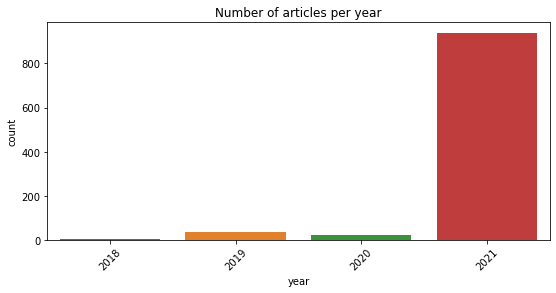

In [41]:
plt.figure(figsize=(9,4))
plt.title("Number of articles per year")
sns.countplot(data=global_warming_df, x='year')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

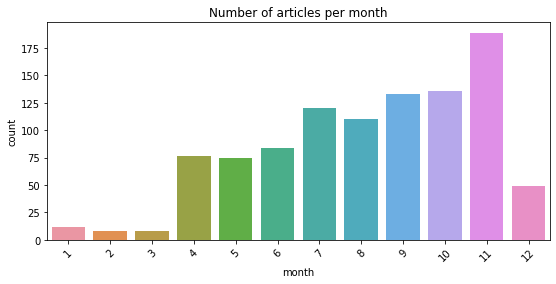

In [42]:
plt.figure(figsize=(9,4))
plt.title("Number of articles per month")
sns.countplot(data=global_warming_df, x='month')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

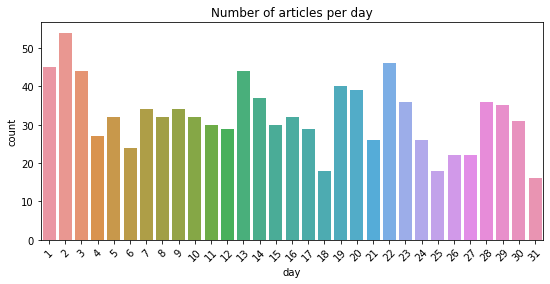

In [43]:
plt.figure(figsize=(9,4))
plt.title("Number of articles per day")
sns.countplot(data=global_warming_df, x='day')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

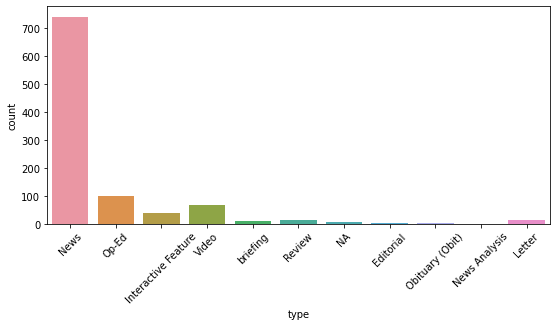

In [44]:
plt.figure(figsize=(9,4))
sns.countplot(data=global_warming_df, x='type')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [45]:
global_warming_df.to_csv('globalwarming.csv')